<a href="https://colab.research.google.com/github/saksham1965/data-analyst/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
url = 'https://docs.google.com/spreadsheets/d/1WieH-IPBXkKPj46XCEsjAgShaRdZ3A9BTN2zz27jSN4/edit?gid=917200446#gid=917200446.csv'
df = pd.read_csv(url)


In [3]:
from google.colab import files
uploaded = files.upload()

Saving day - day.csv to day - day.csv


In [6]:
import pandas as pd

df = pd.read_csv('/content/day - day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df['dteday'] = pd.Timestamp.now()

print(df.columns)

df['dteday'] = pd.to_datetime(df['dteday'])
df['hour'] = df['dteday'].dt.hour
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df['weekday'] = df['dteday'].dt.weekday
# Check if 'casual' and 'registered' columns exist before dropping
if 'casual' in df.columns and 'registered' in df.columns:
    df.drop(['dteday', 'casual', 'registered'], axis=1, inplace=True)
else:
    print("Columns 'casual' and/or 'registered' not found in DataFrame. Skipping drop.")
    df.drop(['dteday'], axis=1, inplace=True) # Drop only 'dteday' column

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'hour', 'day',
       'month', 'year', 'dteday'],
      dtype='object')
Columns 'casual' and/or 'registered' not found in DataFrame. Skipping drop.


In [11]:
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)


In [14]:
df.columns = df.columns.str.strip()


In [20]:
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


In [24]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")


Linear Regression - MSE: 514652.15319114976, RMSE: 717.3926074271673, R²: 0.8496418596044711
Random Forest - MSE: 268608.63703287666, RMSE: 518.2746733469394, R²: 0.9215246746603227


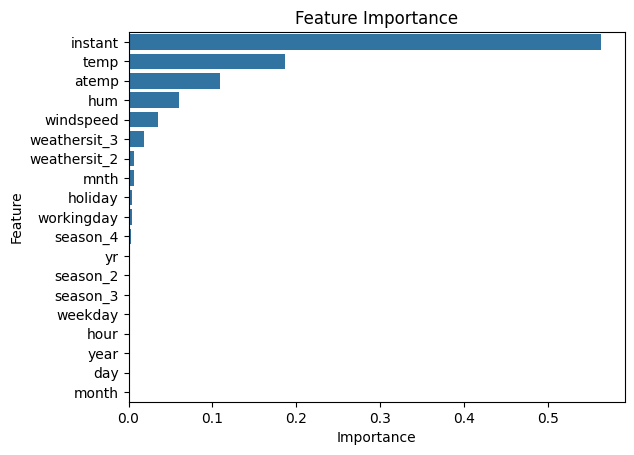

In [26]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()
